In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

import random
import seaborn as sns
pd.options.display.max_rows=300
pd.set_option('display.max_columns', None)

# mimic

In [2]:
df_bt_at = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/06.fluid_resuscitation/01.mimic/df_diuretic_responsitive.csv")

df_fea = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/06.fluid_resuscitation/01.mimic/mimic_diuretic_survival.csv")
df_fea = pd.merge(df_fea,df_bt_at[["stay_id","label_diu_res"]],how="inner",on="stay_id")
choose_time_lst = [1,2,3,4,5,6,7] 
df_fea =  df_fea[df_fea["time"].isin(choose_time_lst)] 

df_fea = df_fea[["groupHPD","label_diu_res","furosemide_amount"]]
df_stat = df_fea.groupby(["groupHPD","label_diu_res"]).agg("mean").reset_index()
map_dict = {"responsive":"Diuretic responsive group","Non-responsive": "Diuretic non-responsive group","No diuretic":"No diuretic group"}
df_stat["label_diu_res"] = df_stat["label_diu_res"].map(map_dict)

fixed_order1 = [2,1,3]
fixed_order2 = ["Diuretic responsive group","Diuretic non-responsive group","No diuretic group"]
df_stat['groupHPD'] = pd.Categorical(df_stat['groupHPD'], categories=fixed_order1, ordered=True)
df_stat['label_diu_res'] = pd.Categorical(df_stat['label_diu_res'], categories=fixed_order2, ordered=True)
df_stat = df_stat.sort_values(by=['groupHPD', 'label_diu_res'])


df_stat["name"] = df_stat["groupHPD"].astype("str") + "_" + df_stat["label_diu_res"].astype("str")
df_stat["furosemide_amount"] = round(df_stat["furosemide_amount"],1)
df_stat

,groupHPD,label_diu_res,furosemide_amount,name
5,2,Diuretic responsive group,35.2,2_Diuretic responsive group
4,2,Diuretic non-responsive group,22.8,2_Diuretic non-responsive group
3,2,No diuretic group,0.0,2_No diuretic group
2,1,Diuretic responsive group,76.4,1_Diuretic responsive group
1,1,Diuretic non-responsive group,61.8,1_Diuretic non-responsive group
0,1,No diuretic group,0.0,1_No diuretic group
8,3,Diuretic responsive group,71.3,3_Diuretic responsive group
7,3,Diuretic non-responsive group,96.3,3_Diuretic non-responsive group
6,3,No diuretic group,0.0,3_No diuretic group


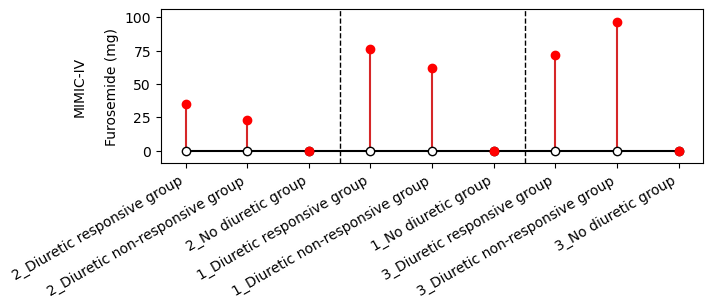

In [3]:
# import numpy as np
import matplotlib.pyplot as plt

levels = df_stat["furosemide_amount"]

fig, ax = plt.subplots(figsize=(7, 2))

ax.plot(df_stat["name"], np.zeros_like(df_stat["name"]), "-o",
        color="k", markerfacecolor="w")  # 基线和标记

# 逐个绘制线条和红色圆圈
for i, (name, level) in enumerate(zip(df_stat["name"], levels)):
    ax.vlines(name, 0, level, color="tab:red")  # 线条
    ax.plot(name, level, "o", color="red")  # 红色圆圈
    
    # 在每三个值之后添加一条直线将它们分隔开
    if (i + 1) % 3 == 0 and i > 0 and i < len(df_stat["name"]) - 1:
        ax.axvline(x=i+0.5, color='k', linestyle='--', linewidth=1)
# plt.title("RR                           DR    PW")
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
plt.ylabel("MIMIC-IV\n\nFurosemide (mg)")
ax.margins(y=0.1)
plt.show()


In [4]:
# df_bt_at = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/06.fluid_resuscitation/01.mimic/df_diuretic_responsitive.csv")

# import matplotlib.pyplot as plt
# lab_dict = {"furosemide_amount": "Furosemide (mg)",  "cum_fluidbance":"Cumulative fluid balance (ml)","urineoutput":"Urineoutput (ml)","colloid_bolus":"Infusion (ml)",'calcium':'calcium','sodium':'sodium', 'potassium':'potassium', 'chloride': 'chloride'}
# fea_lst = [ "furosemide_amount","colloid_bolus"] #,", "furosemide_amount",

# for class_ in [1,2,3]:
#     df_fea = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/06.fluid_resuscitation/01.mimic/mimic_diuretic_survival.csv")
#     df_fea = pd.merge(df_fea,df_bt_at[["stay_id","label_diu_res"]],how="inner",on="stay_id")
#     print(df_fea.label_diu_res.unique())
    
#     df_fea = df_fea[df_fea["groupHPD"]==class_]
#     a = df_fea[["label_diu_res","stay_id"]].drop_duplicates()
#     print(a.label_diu_res.value_counts())
#     for fea in fea_lst:
#         choose_time_lst = [1,2,3,4,5,6,7] 
#         df =  df_fea[df_fea["time"].isin(choose_time_lst)] 
#         df1 = df[df["label_diu_res"]=="responsive"].groupby('time').agg({fea:"mean"}).reset_index() #[[fea,"time"]]
#         df2 = df[df["label_diu_res"]=="Non-responsive"].groupby('time').agg({fea:"mean"}).reset_index() #[[fea,"time"]]
#         df3 = df[df["label_diu_res"]=="No diuretic"].groupby('time').agg({fea:"mean"}).reset_index()#[[fea,"time"]]

#         fig = plt.figure(figsize=(2.5,3))
#         size = 14
#         ax=plt.gca()
#         ax.tick_params(axis='both', which='both', labelsize=size,
#                bottom=False, top=False, labelbottom=True,
#                left=False, right=False, labelright=True, labelleft=False)
# #        ax.spines['left'].set_visible(False)
# #        ax.spines['top'].set_visible(False)
#         ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
#         plt.plot(df1.time.tolist(),df1[fea].tolist(),marker=8,label="Diuertic-responsive",c="#3fc968")
#         plt.plot(df2.time.tolist(),df2[fea].tolist(),marker=8,label="Diuertic-nonresponsive",c="#74a8ff")
#         plt.plot(df3.time.tolist(),df3[fea].tolist(),marker=8,label="No diuretic",c="#f8746a")
# #        plt.legend(ncol=3,frameon=False)
#         plt.xticks([1,2,3,4,5,6,7],[1,2,3,4,5,6,7])
#         print("  C" + str(class_))
#         map_dict = {1:"DR",2:"RR",3:"PW"}
#         tit =map_dict[class_]
#         plt.title(tit,x=0.5,y=1.01,fontsize=size)
#         plt.xlabel('Time after SA-AKI onset (day)',fontsize=size)
#         ylabel = "MIMIC-IV\n\n" + lab_dict[fea]
#         plt.ylabel(ylabel,fontsize=size)
# #        plt.ylim([min_dict[fea],max_dict[fea]])
# #         plt.axhline(y=-2000, color='black', linestyle='--', linewidth=1)
# #         plt.axhline(y=2000, color='black', linestyle='--', linewidth=1)
#         tit = "mimic_timeseries_C" + str(class_) + "_" +fea + ".pdf"
#         plt.savefig(tit, bbox_inches = 'tight')
#         plt.show()

# aumc

In [5]:
# df_bt_at = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/06.fluid_resuscitation/02.aumc//df_diuretic_responsitive.csv")
# import matplotlib.pyplot as plt
# lab_dict = {"furosemide_amount": "Furosemide (mg)",  "cum_fluidbance":"Cumulative fluid balance (ml)","urineoutput":"Urineoutput (ml)","colloid_bolus":"Infusion (ml)",'calcium':'calcium','sodium':'sodium', 'potassium':'potassium', 'chloride': 'chloride'}
# fea_lst = ["furosemide_amount","colloid_bolus"]
# #fea_lst = [ 'calcium','sodium', 'potassium', 'chloride']

# max_dict = {"urineoutput":3000,"cum_fluidbance":15000}
# min_dict = {"urineoutput":0,"cum_fluidbance":2000}
# for class_ in [1,2,3]:
#     df_fea = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/06.fluid_resuscitation/02.aumc/aumcdb_diuretic_survival.csv")
#     df_fea = pd.merge(df_fea,df_bt_at[["stay_id","label_diu_res"]],how="inner",on="stay_id")
#     df_fea = df_fea[df_fea["groupHPD"]==class_]
#     a = df_fea[["label_diu_res","stay_id"]].drop_duplicates()
#     print(a.label_diu_res.value_counts())
#     for fea in fea_lst:
#         choose_time_lst = [1,2,3,4,5,6,7] 
#         df =  df_fea[df_fea["time"].isin(choose_time_lst)] 
#         df1 = df[df["label_diu_res"]=="responsive"].groupby('time').agg({fea:"mean"}).reset_index() #[[fea,"time"]]
#         df2 = df[df["label_diu_res"]=="Non-responsive"].groupby('time').agg({fea:"mean"}).reset_index() #[[fea,"time"]]
#         df3 = df[df["label_diu_res"]=="No diuretic"].groupby('time').agg({fea:"mean"}).reset_index()#[[fea,"time"]]

#         fig = plt.figure(figsize=(2.5,3))
#         size = 14
#         size_a = 16
#         ax=plt.gca()
#         ax.tick_params(axis='both', which='both', labelsize=size,
#                bottom=False, top=False, labelbottom=True,
#                left=False, right=False, labelright=True, labelleft=False)
# #         ax.spines['left'].set_visible(False)
# #         ax.spines['top'].set_visible(False)
#         ax.yaxis.tick_right()
#         ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
#         plt.plot(df1.time.tolist(),df1[fea].tolist(),marker=8,label="Diuertic-responsive",c="#3fc968")
#         plt.plot(df2.time.tolist(),df2[fea].tolist(),marker=8,label="Diuertic-nonresponsive",c="#74a8ff")
#         plt.plot(df3.time.tolist(),df3[fea].tolist(),marker=8,label="No diuretic",c="#f8746a")
# #        plt.legend(ncol=3,frameon=False)
#         plt.xticks([1,2,3,4,5,6,7],[1,2,3,4,5,6,7])
#         print("  C" + str(class_))
#         map_dict = {1:"DR",2:"RR",3:"PW"}
#         tit =map_dict[class_]
#         plt.title(tit,x=0.5,y=1.01,fontsize=size)
#         plt.xlabel('Time after SA-AKI onset (day)',fontsize=size)
#         ylabel = "AUMC\n\n" + lab_dict[fea]
#         plt.ylabel(ylabel,fontsize=size_a)
        
# #        plt.ylim([min_dict[fea],max_dict[fea]])
        
# #         plt.axhline(y=-2000, color='black', linestyle='--', linewidth=1)
# #         plt.axhline(y=2000, color='black', linestyle='--', linewidth=1)
#         tit = "aumcdb_timeseries_C" + str(class_) + "_" +fea + ".pdf"
#         plt.savefig(tit, bbox_inches = 'tight')
#         plt.show()

In [6]:
df_bt_at = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/06.fluid_resuscitation/02.aumc//df_diuretic_responsitive.csv")

df_fea = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/06.fluid_resuscitation/02.aumc/aumcdb_diuretic_survival.csv")
df_fea = pd.merge(df_fea,df_bt_at[["stay_id","label_diu_res"]],how="inner",on="stay_id")
choose_time_lst = [1,2,3,4,5,6,7] 
df_fea =  df_fea[df_fea["time"].isin(choose_time_lst)] 
    
df_fea = df_fea[["groupHPD","label_diu_res","furosemide_amount"]]
df_stat = df_fea.groupby(["groupHPD","label_diu_res"]).agg("mean").reset_index()
map_dict = {"responsive":"Diuretic responsive group","Non-responsive": "Diuretic non-responsive group","No diuretic":"No diuretic group"}
df_stat["label_diu_res"] = df_stat["label_diu_res"].map(map_dict)

fixed_order1 = [2,1,3]
fixed_order2 = ["Diuretic responsive group","Diuretic non-responsive group","No diuretic group"]
df_stat['groupHPD'] = pd.Categorical(df_stat['groupHPD'], categories=fixed_order1, ordered=True)
df_stat['label_diu_res'] = pd.Categorical(df_stat['label_diu_res'], categories=fixed_order2, ordered=True)
df_stat = df_stat.sort_values(by=['groupHPD', 'label_diu_res'])


df_stat["name"] = df_stat["groupHPD"].astype("str") + "_" + df_stat["label_diu_res"].astype("str")
df_stat["furosemide_amount"] = round(df_stat["furosemide_amount"],1)
df_stat

,groupHPD,label_diu_res,furosemide_amount,name
5,2,Diuretic responsive group,27.1,2_Diuretic responsive group
4,2,Diuretic non-responsive group,24.5,2_Diuretic non-responsive group
3,2,No diuretic group,0.0,2_No diuretic group
2,1,Diuretic responsive group,40.6,1_Diuretic responsive group
1,1,Diuretic non-responsive group,53.0,1_Diuretic non-responsive group
0,1,No diuretic group,0.0,1_No diuretic group
8,3,Diuretic responsive group,83.9,3_Diuretic responsive group
7,3,Diuretic non-responsive group,81.4,3_Diuretic non-responsive group
6,3,No diuretic group,0.0,3_No diuretic group


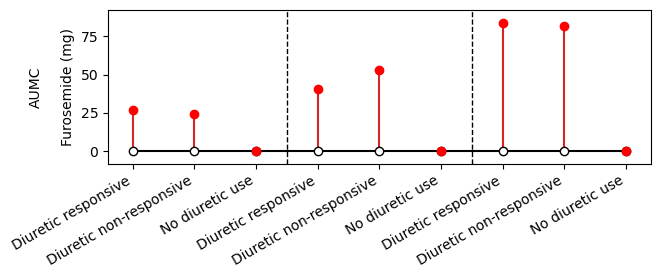

In [7]:
# import numpy as np
import matplotlib.pyplot as plt

levels = df_stat["furosemide_amount"]
xticks_custom = ["Diuretic responsive","Diuretic non-responsive","No diuretic use"]*3
fig, ax = plt.subplots(figsize=(7, 2))

ax.plot(df_stat["name"], np.zeros_like(df_stat["name"]), "-o",
        color="k", markerfacecolor="w")  # 基线和标记

# 逐个绘制线条和红色圆圈
for i, (name, level) in enumerate(zip(df_stat["name"], levels)):
    ax.vlines(name, 0, level, color="tab:red")  # 线条
    ax.plot(name, level, "o", color="red")  # 红色圆圈
    
    # 在每三个值之后添加一条直线将它们分隔开
    if (i + 1) % 3 == 0 and i > 0 and i < len(df_stat["name"]) - 1:
        ax.axvline(x=i+0.5, color='k', linestyle='--', linewidth=1)

plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
plt.ylabel("AUMC\n\nFurosemide (mg)")
plt.xticks(df_stat["name"],xticks_custom)
ax.margins(y=0.1)
plt.show()
